In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [74]:
#how to connect sql into python
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Ahmi@123",
                          database="ecommerce")

In [76]:
#activate cursor in a database
cur=db.cursor()


# List all unique cities where customers are located.



In [12]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

 Count the number of orders placed in 2017.

In [15]:
query = """
SELECT 
    YEAR(order_purchase_timestamp) AS OrderPurchaseYear,
    COUNT(order_id) AS CountOfOrders
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2017
GROUP BY OrderPurchaseYear;
"""

cur.execute(query)
data=cur.fetchall()
data

[(2017, 90202)]

# Find the total sales per category.

In [17]:
query="""select products.product_category as Products_Category,
 ROUND(SUM(order_items.price), 2) as Total_Price
 from ecommerce.products
 join ecommerce.order_items
 on products.product_id=order_items.product_id
 join ecommerce.payments
 on payments.order_id=order_items.order_id
 group by Products_Category
 order by Total_Price desc;"""

cur.execute(query)
data=cur.fetchall()
data

[('HEALTH BEAUTY', 5189423.2),
 ('Watches present', 5012573.19),
 ('bed table bath', 4370204.08),
 ('sport leisure', 4095985.36),
 ('computer accessories', 3769110.27),
 ('Furniture Decoration', 3060375.57),
 ('housewares', 2666348.0),
 ('Cool Stuff', 2649237.97),
 ('automotive', 2467010.04),
 ('Garden tools', 2072870.17),
 ('toys', 2001180.36),
 ('babies', 1737918.44),
 ('perfumery', 1651019.23),
 ('telephony', 1357596.64),
 ('Furniture office', 1144635.84),
 ('PCs', 971246.44),
 ('stationary store', 956115.96),
 ('pet Shop', 891729.2),
 ('musical instruments', 843714.92),
 ('electrostile', 803666.64),
 (None, 763826.36),
 ('electronics', 667116.84),
 ('Games consoles', 664458.52),
 ('Fashion Bags and Accessories', 648879.32),
 ('Bags Accessories', 593683.72),
 ('Construction Tools Construction', 587899.48),
 ('ELECTRICES 2', 493061.24),
 ('Casa Construcao', 350473.36),
 ('Agro Industria e Comercio', 335367.8),
 ('home appliances', 329162.08),
 ('Room Furniture', 292235.0),
 ('House c

In [18]:
df=pd.DataFrame(data,columns=['Products_Category','Sales'])

In [20]:
df.head(10)


,Products_Category,Sales
0,HEALTH BEAUTY,5189423.20
1,Watches present,5012573.19
2,bed table bath,4370204.08
3,sport leisure,4095985.36
4,computer accessories,3769110.27
5,Furniture Decoration,3060375.57
6,housewares,2666348.00
7,Cool Stuff,2649237.97
8,automotive,2467010.04
9,Garden tools,2072870.17


-- Calculate the percentage of orders that were paid in installments.

In [22]:
query="""select sum((case when payment_installments>=1 then 1
 else 0 
 end))/count(*)*100 as 	Percentage_Installment
from payments;

"""

In [23]:
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

In [24]:
df=pd.DataFrame(data,columns=["PercentageofOrders"])
df

,PercentageofOrders
0,99.9981


In [25]:
query=""" -- Count the number of customers from each state. customers
select customer_state,count(customer_state) as customer_count from ecommerce.customers
group by customer_state; """
cur.execute(query)
data=cur.fetchall()
data

[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

In [26]:
df=pd.DataFrame(data,columns=["State","No_of_Customers"])
df

,State,No_of_Customers
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


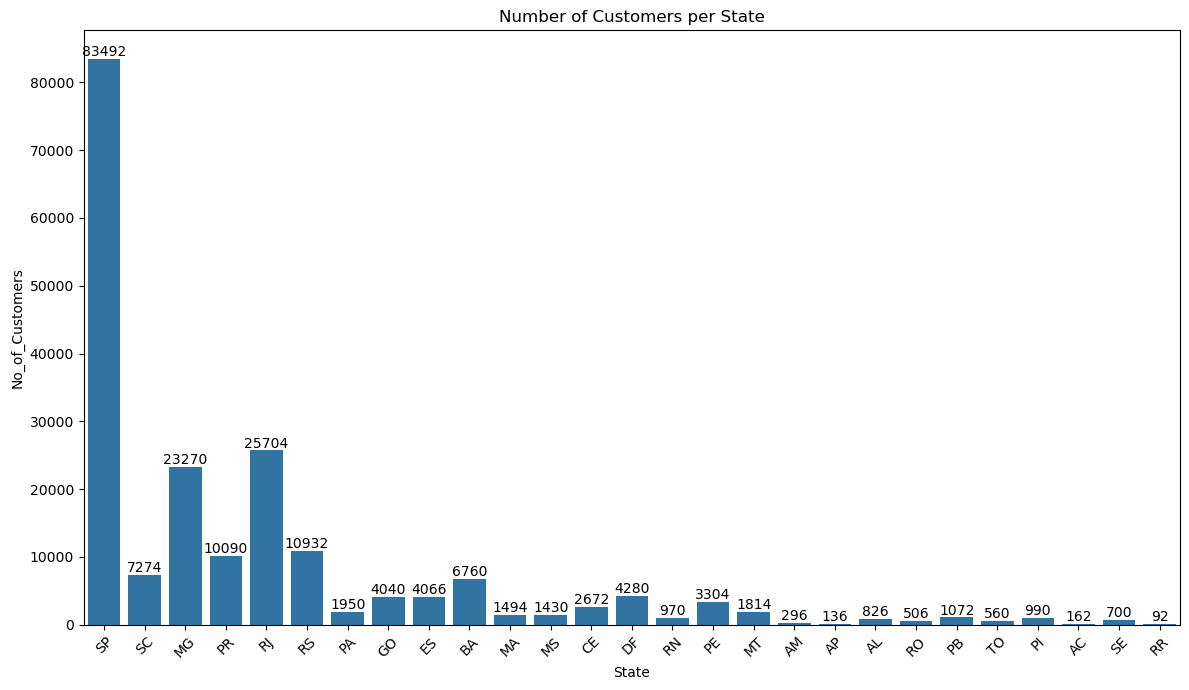

In [27]:
plt.figure(figsize=[12,7])
ax = sns.barplot(data=df, x="State", y="No_of_Customers")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # value (no decimal)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # position
                ha='center', va='center',        # horizontal & vertical alignment
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')  # offset above bar

plt.xticks(rotation=45)
plt.title("Number of Customers per State")
plt.tight_layout()
plt.show()

# Intermediate Queries

# Calculate the number of orders per month in 2018.

In [30]:
query= """select year(order_purchase_timestamp) as order_purchase_year,
monthname(order_purchase_timestamp) as order_Purchase_Months
,count(order_id) as Countoforderid
 from ecommerce.orders
where year(order_purchase_timestamp)=2018
group by order_purchase_year,
order_Purchase_Months
order by Countoforderid desc
; """

cur.execute(query)
data=cur.fetchall()
data

[(2018, 'January', 14538),
 (2018, 'March', 14422),
 (2018, 'April', 13878),
 (2018, 'May', 13746),
 (2018, 'February', 13456),
 (2018, 'August', 13024),
 (2018, 'July', 12584),
 (2018, 'June', 12334),
 (2018, 'September', 32),
 (2018, 'October', 8)]

In [31]:
df=pd.DataFrame(data,columns=["order_purchase_year","order_purchase_Months","Countoforderid"])
df

,order_purchase_year,order_purchase_Months,Countoforderid
0,2018,January,14538
1,2018,March,14422
2,2018,April,13878
3,2018,May,13746
4,2018,February,13456
5,2018,August,13024
6,2018,July,12584
7,2018,June,12334
8,2018,September,32
9,2018,October,8


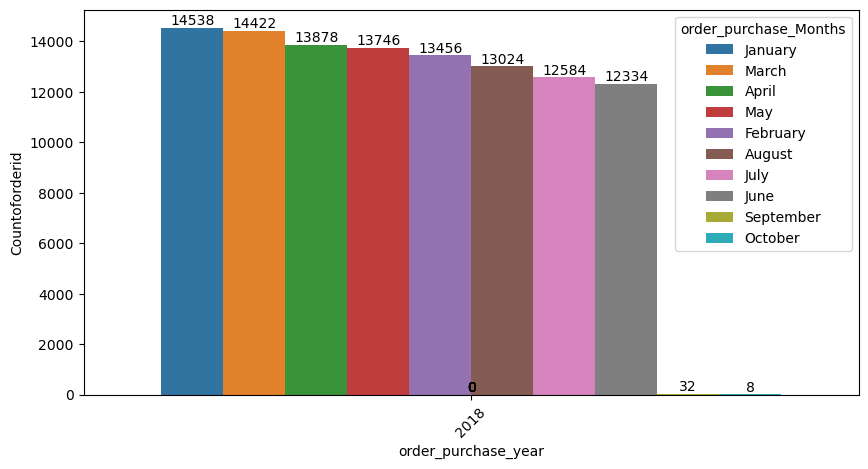

In [32]:
plt.figure(figsize=[10,5])
ax=sns.barplot(data=df,x=df["order_purchase_year"],y=df["Countoforderid"],hue=df["order_purchase_Months"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # value (no decimal)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # position
                ha='center', va='center',        # horizontal & vertical alignment
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')  # offset above bar

plt.xticks(rotation=45)
plt.show()

In [33]:
query= """select customers.customer_city as Customer_City,
avg(order_item_id) as Average_prod_per_orders
 from ecommerce.order_items
join ecommerce.orders
on order_items.order_id=orders.order_id
join ecommerce.customers
on orders.customer_id=customers.customer_id
group by Customer_City
order by Average_prod_per_orders desc


;
; """

cur.execute(query)
data=cur.fetchall()
data

[('celso ramos', Decimal('6.0769')),
 ('ipua', Decimal('4.4615')),
 ('padre carvalho', Decimal('4.0000')),
 ('alto paraiso de goias', Decimal('3.8889')),
 ('cicero dantas', Decimal('3.6522')),
 ('datas', Decimal('3.5000')),
 ('candido godoi', Decimal('3.5000')),
 ('uniao da vitoria', Decimal('3.3404')),
 ('morro agudo', Decimal('3.3000')),
 ('inconfidentes', Decimal('3.1429')),
 ('matias olimpio', Decimal('3.0000')),
 ('ubajara', Decimal('2.8750')),
 ('nova esperanca do sul', Decimal('2.6667')),
 ('guapore', Decimal('2.6429')),
 ('belo oriente', Decimal('2.5000')),
 ('curralinho', Decimal('2.5000')),
 ('picarra', Decimal('2.5000')),
 ('morro de sao paulo', Decimal('2.5000')),
 ('teixeira soares', Decimal('2.5000')),
 ('cidelandia', Decimal('2.5000')),
 ('capitolio', Decimal('2.4545')),
 ('formosa do rio preto', Decimal('2.4286')),
 ('itajobi', Decimal('2.3333')),
 ('capela', Decimal('2.3333')),
 ('taguatinga', Decimal('2.2500')),
 ('aparecida do taboado', Decimal('2.2500')),
 ('maracan

In [34]:
df=pd.DataFrame(data,columns=["CustomerCity","Average_per-order"])

In [35]:
df

,CustomerCity,Average_per-order
0,celso ramos,6.0769
1,ipua,4.4615
2,padre carvalho,4.0000
3,alto paraiso de goias,3.8889
4,cicero dantas,3.6522
...,...,...
4105,sao mamede,1.0000
4106,japaratuba,1.0000
4107,vila bela da santissima trindade,1.0000
4108,tibau do sul,1.0000


# Calculate the percentage of total revenue contributed by each product category.

In [37]:
query="""SELECT 
  p.product_category,
  ROUND(SUM(oi.price * oi.freight_value), 2) AS Category_Revenue,
  ROUND(SUM(oi.price * oi.freight_value) * 100 / MAX(t.total_revenue), 2) AS percentage_of_total_revenue
FROM 
  ecommerce.products p
JOIN 
  ecommerce.order_items oi ON p.product_id = oi.product_id,
  (
    SELECT 
      SUM(price * freight_value) AS total_revenue
    FROM 
      ecommerce.order_items
  ) AS t
GROUP BY 
  p.product_category; """

cur.execute(query)
data=cur.fetchall()
data

[('HEALTH BEAUTY', 73378606.57, 18.02),
 ('sport leisure', 60129272.61, 14.77),
 ('Cool Stuff', 40744748.06, 10.01),
 ('computer accessories', 43423189.19, 10.67),
 ('Watches present', 49324731.61, 12.12),
 ('housewares', 45711574.23, 11.23),
 ('electronics', 9351010.81, 2.3),
 (None, 9688169.31, 2.38),
 ('toys', 24086779.4, 5.92),
 ('bed table bath', 47227280.07, 11.6),
 ('Games consoles', 7397427.49, 1.82),
 ('automotive', 40422272.17, 9.93),
 ('Furniture Decoration', 41318817.21, 10.15),
 ('home appliances', 5796265.19, 1.42),
 ('telephony', 13136763.8, 3.23),
 ('Construction Tools Construction', 10360276.54, 2.54),
 ('perfumery', 14294643.86, 3.51),
 ('stationary store', 10391294.99, 2.55),
 ('Room Furniture', 7245887.05, 1.78),
 ('Fashion Bags and Accessories', 5393421.44, 1.32),
 ('Garden tools', 34746223.77, 8.53),
 ('Fashion Underwear and Beach Fashion', 289934.71, 0.07),
 ('pet Shop', 12055187.91, 2.96),
 ('SIGNALIZATION AND SAFETY', 2084532.7, 0.51),
 ('ELECTRICES 2', 1370420

In [38]:
df=pd.DataFrame(data,columns=["product_category","Category_Revenue","percentage_of_total_revenue"])
df.head()

,product_category,Category_Revenue,percentage_of_total_revenue
0,HEALTH BEAUTY,73378606.57,18.02
1,sport leisure,60129272.61,14.77
2,Cool Stuff,40744748.06,10.01
3,computer accessories,43423189.19,10.67
4,Watches present,49324731.61,12.12


# Identify the correlation between product price and the number of times a product has been purchased.

In [40]:
query=""" select products.product_category as Product_Category,
count(order_items.product_id) as product_has_been_Purchases,
round(avg(order_items.price),2) as Average_Product_price
from ecommerce.products
join ecommerce.order_items
on products.product_id=order_items.product_id
group by Product_Category
order by Average_Product_price desc

;

"""

cur.execute(query)
data=cur.fetchall()
data

[('PCs', 406, 1098.34),
 ('HOUSE PASTALS OVEN AND CAFE', 152, 624.29),
 ('ELECTRICES 2', 476, 476.12),
 ('Agro Industria e Comercio', 424, 342.12),
 ('musical instruments', 1360, 281.62),
 ('electrostile', 1358, 280.78),
 ('Kitchen portable and food coach', 30, 264.57),
 ('fixed telephony', 528, 225.69),
 ('CONSTRUCTION SECURITY TOOLS', 388, 208.99),
 ('Watches present', 11982, 201.14),
 ('climatization', 594, 185.27),
 ('Furniture', 218, 183.75),
 ('PC Gamer', 18, 171.77),
 ('Cool Stuff', 7592, 167.36),
 ('Furniture Kitchen Service Area Dinner and Garden', 562, 164.87),
 ('Furniture office', 3382, 162.01),
 ('song', 76, 158.8),
 ('Construction Tools Construction', 1858, 155.73),
 ('Construction Tools Tools', 206, 154.41),
 ('Industry Commerce and Business', 536, 148.02),
 ('La Cuisine', 28, 146.78),
 ('insurance and services', 4, 141.64),
 ('automotive', 8470, 139.96),
 ('audio', 728, 139.25),
 ('Games consoles', 2274, 138.49),
 ('Casa Construcao', 1208, 137.56),
 ('Room Furniture', 1

In [41]:
df=pd.DataFrame(data,columns=["Product_Id","Average_Price","product_has_been_Purchases"])
df


,Product_Id,Average_Price,product_has_been_Purchases
0,PCs,406,1098.34
1,HOUSE PASTALS OVEN AND CAFE,152,624.29
2,ELECTRICES 2,476,476.12
3,Agro Industria e Comercio,424,342.12
4,musical instruments,1360,281.62
...,...,...,...
69,Drink foods,556,54.60
70,cds music dvds,28,52.14
71,Hygiene diapers,78,40.19
72,flowers,66,33.64


In [42]:
arr1=df["Average_Price"]
arr2=df["product_has_been_Purchases"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

In [46]:
query=""" select sellers.seller_id as Seller_Id,
count(order_items.order_id) as Total_Orders_By_Sellers,
round(sum(price),2) as Total_Revenue
from ecommerce.order_items
join ecommerce.sellers
on order_items.seller_id=sellers.seller_id
group by Seller_Id
order by Total_Revenue desc;"""

cur.execute(query)
data=cur.fetchall()
data

[('4869f7a5dfa277a7dca6462dcf3b52b2', 2312, 458945.26),
 ('53243585a1d6dc2643021fd1853d8905', 820, 445552.1),
 ('4a3ca9315b744ce9f8e9374361493884', 3974, 400945.84),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 1172, 388084.06),
 ('7c67e1448b00f6e969d365cea6b010ab', 2728, 375847.78),
 ('7e93a43ef30c4f03f38b393420bc753a', 680, 352863.74),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 3102, 320473.14),
 ('7a67c85e85bb2ce8582c35f2203ad736', 2342, 283491.06),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 2856, 277937.1),
 ('955fee9216a65b617aa5c0531780ce60', 2998, 270343.4),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 1084, 256222.38),
 ('6560211a19b47992c3666cc44a7e94c0', 4066, 246609.66),
 ('620c87c171fb2a6dd6e8bb4dec959fc6', 1596, 229549.0),
 ('7d13fca15225358621be4086e1eb0964', 1156, 227257.94),
 ('5dceca129747e92ff8ef7a997dc4f8ca', 692, 224311.06),
 ('1f50f920176fa81dab994f9023523100', 3862, 213878.42),
 ('cc419e0650a3c5ba77189a1882b7556a', 3550, 208576.84),
 ('a1043bafd471dff536d0c462352beb48', 1540, 203802.32),

In [48]:
df=pd.DataFrame(data,columns=["Seller_Id","Total_Orders_By_Sellers","Total_Revenue"])
df.head()

,Seller_Id,Total_Orders_By_Sellers,Total_Revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,2312,458945.26
1,53243585a1d6dc2643021fd1853d8905,820,445552.10
2,4a3ca9315b744ce9f8e9374361493884,3974,400945.84
3,fa1c13f2614d7b5c4749cbc52fecda94,1172,388084.06
4,7c67e1448b00f6e969d365cea6b010ab,2728,375847.78


In [50]:
df=df.head()

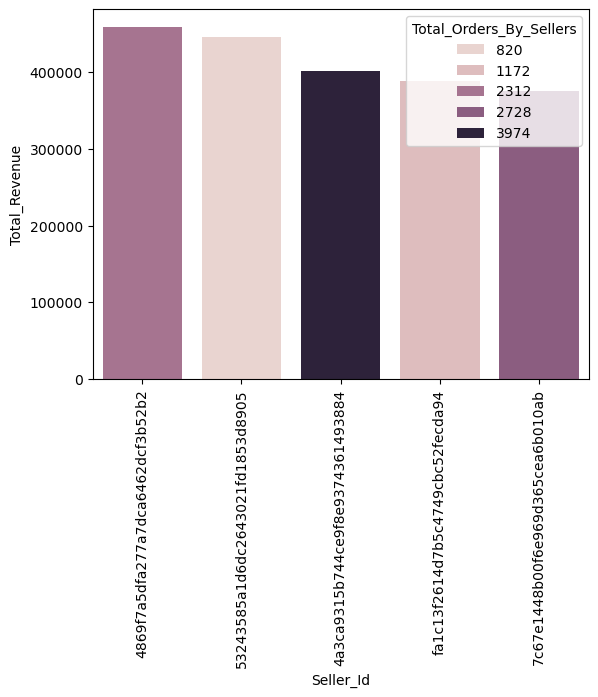

In [51]:
sns.barplot(x=df["Seller_Id"],y=df["Total_Revenue"],hue=df["Total_Orders_By_Sellers"])
plt.xticks(rotation=90)
plt.show()

# Advanced Queries

# Calculate the moving average of order values for each customer over their order history

In [78]:
query=""" select  Customer_id,
order_purchase_timestamp,
Payment,
avg(Payment) over(partition by Customer_id order by order_purchase_timestamp
rows between 2 preceding and current row ) as Moving_Average
from
(select orders.customer_id as Customer_id
,orders.order_purchase_timestamp as order_purchase_timestamp 
,payments.payment_value as Payment
 from ecommerce.payments
join ecommerce.orders
on orders.order_id=payments.order_id) as a;"""

cur.execute(query)
data=cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.42,
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-2

In [79]:
df=pd.DataFrame(data,columns=["Customer_id","order_purchase_timestamp","Payment","Moving_Average"])

In [80]:
df.head(10)

,Customer_id,order_purchase_timestamp,Payment,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
9,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


# Calculate the cumulative sales per month for each year.

In [83]:
query="""-- Calculate the cumulative sales per month for each year.

select Order_Purchase_Year,Order_Purchase_Months,Count_of_Orders,Monthly_Sales,sum(Monthly_Sales)
over(order by Order_Purchase_Year,Order_Purchase_Months) as cumulative_sales
from
(select year(order_purchase_timestamp) as Order_Purchase_Year,
month(order_purchase_timestamp) as Order_Purchase_Months,
count(order_purchase_timestamp) as Count_of_Orders,
round(sum(order_items.price),2) as Monthly_Sales
from ecommerce.order_items
join ecommerce.orders
on order_items.order_id=orders.order_id
group by Order_Purchase_Year,Order_Purchase_Months
order by Order_Purchase_Year,Order_Purchase_Months asc) as a;
  """

cur.execute(query)
data=cur.fetchall()
data

[(2016, 9, 12, 534.72, 534.72),
 (2016, 10, 726, 99015.32, 99550.04000000001),
 (2016, 12, 2, 21.8, 99571.84000000001),
 (2017, 1, 1910, 240625.74, 340197.58),
 (2017, 2, 3902, 494606.04, 834803.62),
 (2017, 3, 6000, 748688.6, 1583492.22),
 (2017, 4, 5368, 719854.46, 2303346.6799999997),
 (2017, 5, 8272, 1012142.28, 3315488.96),
 (2017, 6, 7166, 866077.2, 4181566.16),
 (2017, 7, 9038, 996062.96, 5177629.12),
 (2017, 8, 9820, 1147943.36, 6325572.48),
 (2017, 9, 9662, 1248803.38, 7574375.86),
 (2017, 10, 10644, 1328438.86, 8902814.72),
 (2017, 11, 17330, 2020542.74, 10923357.46),
 (2017, 12, 12616, 1487828.34, 12411185.8),
 (2018, 1, 16416, 1900060.72, 14311246.520000001),
 (2018, 2, 15344, 1688357.42, 15999603.940000001),
 (2018, 3, 16434, 1966426.88, 17966030.82),
 (2018, 4, 15950, 1993295.5, 19959326.32),
 (2018, 5, 15850, 1993035.36, 21952361.68),
 (2018, 6, 14156, 1730248.62, 23682610.3),
 (2018, 7, 14184, 1791014.44, 25473624.740000002),
 (2018, 8, 14496, 1709372.66, 27182997.40000

In [88]:
df=pd.DataFrame(data,columns=["Order_Purchase_Year","Order_Purchase_Months","Count_of_Orders","Monthly_Sales","cumulative_sales"])
df.head()

,Order_Purchase_Year,Order_Purchase_Months,Count_of_Orders,Monthly_Sales,cumulative_sales
0,2016,9,12,534.72,534.72
1,2016,10,726,99015.32,99550.04
2,2016,12,2,21.80,99571.84
3,2017,1,1910,240625.74,340197.58
4,2017,2,3902,494606.04,834803.62


In [92]:
df.size

120

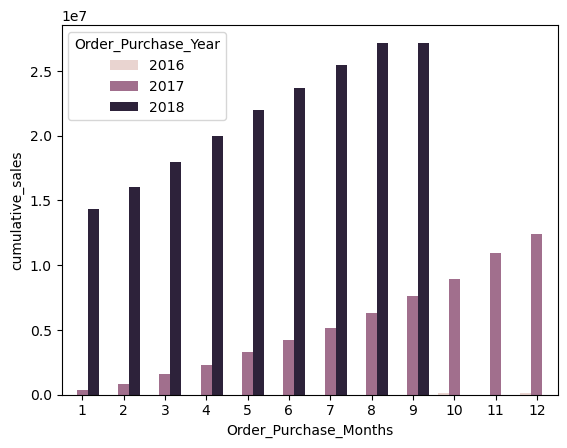

In [104]:
sns.barplot(data=df,x=df["Order_Purchase_Months"],y=df["cumulative_sales"],hue=df["Order_Purchase_Year"])
plt.show()

# Calculate the year-over-year growth rate of total sales.

In [107]:
query= """SELECT 
  YEAR(order_purchase_timestamp) AS Order_per_years,
  ROUND(SUM(price), 2) AS Payment,
  ROUND(
    (SUM(price) - LAG(SUM(price)) OVER (ORDER BY YEAR(order_purchase_timestamp)))
    / LAG(SUM(price)) OVER (ORDER BY YEAR(order_purchase_timestamp)) * 100,
    2
  ) AS YoY_Growth_Percent
FROM 
  ecommerce.order_items
JOIN 
  ecommerce.orders ON order_items.order_id = orders.order_id
GROUP BY 
  YEAR(order_purchase_timestamp)
ORDER BY 
  Order_per_years; """ 

cur.execute(query)
data=cur.fetchall()
data

[(2016, 99571.84, None),
 (2017, 12311613.96, 12264.55),
 (2018, 14772101.6, 19.99)]

In [109]:
df=pd.DataFrame(data,columns=["Order_Years","Payment","YoY_Growth_Percent"])
df

,Order_Years,Payment,YoY_Growth_Percent
0,2016,99571.84,NaN
1,2017,12311613.96,12264.55
2,2018,14772101.60,19.99


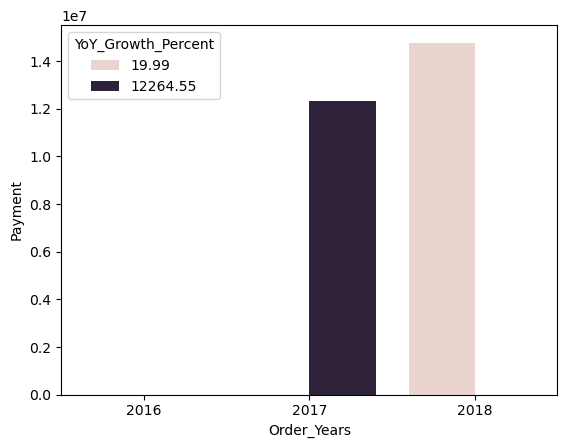

In [133]:
sns.barplot(data=df,x=df["Order_Years"],y=df["Payment"],hue=df["YoY_Growth_Percent"])
plt.show()

# -- Identify the top 3 customers who spent the most money in each year.

In [140]:
query="""WITH customer_yearly_spending AS (
  SELECT 
    customers.customer_id,
    YEAR(orders.order_purchase_timestamp) AS order_year,
    ROUND(SUM(order_items.price), 2) AS total_spent
  FROM 
    ecommerce.orders
  JOIN 
    ecommerce.order_items ON orders.order_id = order_items.order_id
  JOIN 
    ecommerce.customers ON orders.customer_id = customers.customer_id
  GROUP BY 
    customers.customer_id, YEAR(orders.order_purchase_timestamp)
),

ranked_spending AS (
  SELECT *,
    RANK() OVER (PARTITION BY order_year ORDER BY total_spent DESC) AS spending_rank
  FROM 
    customer_yearly_spending
)

SELECT 
  customer_id, 
  order_year, 
  total_spent, 
  spending_rank
FROM 
  ranked_spending
WHERE 
  spending_rank <= 3
ORDER BY 
  order_year, spending_rank;
 """

cur.execute(query)
data=cur.fetchall()
data

[('a9dc96b027d1252bbac0a9b72d837fc6', 2016, 5596.0, 1),
 ('1d34ed25963d5aae4cf3d7f3a4cda173', 2016, 5199.96, 2),
 ('4a06381959b6670756de02e07b83815f', 2016, 4796.0, 3),
 ('1617b1357756262bfa56ab541c47bc16', 2017, 53760.0, 1),
 ('c6e2731c5b391845f6800c97401a43a9', 2017, 26940.0, 2),
 ('3fd6777bbce08a352fddd04e4a7cc8f6', 2017, 25996.0, 3),
 ('ec5b2ba62e574342386871631fafd3fc', 2018, 28640.0, 1),
 ('f48d464a0baaea338cb25f816991ab1f', 2018, 26916.0, 2),
 ('e0a2412720e9ea4f26c1ac985f6a7358', 2018, 18399.6, 3)]

In [144]:
df=pd.DataFrame(data=data,columns=["customer_id","order_year","total_spent","spending_rank"])
df.head()

,customer_id,order_year,total_spent,spending_rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,5596.00,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,5199.96,2
2,4a06381959b6670756de02e07b83815f,2016,4796.00,3
3,1617b1357756262bfa56ab541c47bc16,2017,53760.00,1
4,c6e2731c5b391845f6800c97401a43a9,2017,26940.00,2


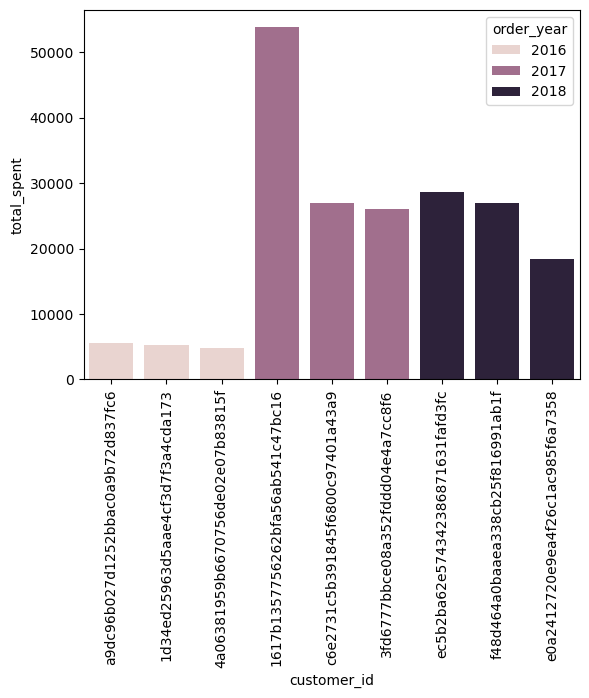

In [154]:
sns.barplot(data=df,x=df["customer_id"],y=df["total_spent"],hue=df["order_year"])
plt.xticks(rotation=90)
plt.show()
